# 1. Perkenalan

**Nama**    : **Ahmad Qais Alfiansyah**<br>
**Batch**   : **RMT-027**<br>
**Project** : **Live Code 4**<br>

<hr>

## **Latar Belakang Masalah**
<p> Saya .<br>
Saya menggunakan 2 model untuk memprediksi apakah karyawan akan keluar atau tidak berdasarkan kenaikan gaji</p>
<p>Model yang saya pergunakan adalah DecisionTree dan Random Forest dan akan mengevaluasi dimana yang paling fit di antara keduanya</p>

# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error

import joblib

In [2]:
df = pd.read_csv('/Users/qaisahmad/Documents/GitHub/LC5/p1-ftds027-rmt-lc5-qaisahmaddd/employee-attrition.csv')

# 3. Data Loading

## Menampilkan 10 baris pertama dan terakhir dataset

Saya akan membuat kolom-kolom dataset tidak tersembunyi serta menampilkan 10 baris pertama dan 10 baris terakhir dataset

In [3]:
pd.set_option('display.max_columns', 30)
pd.concat([df.head(10), df.tail(10)])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
0,28,No,Travel_Rarely,Research & Development,3,3,Medical,1121,Female,Manufacturing Director,Medium,Divorced,7655,0,17,3,10,Good,9,7,1,7
1,37,Yes,Travel_Rarely,Research & Development,11,2,Medical,1033,Female,Healthcare Representative,Medium,Married,4777,5,15,3,15,Bad,1,0,0,0
2,38,No,Travel_Rarely,Sales,2,2,Marketing,1125,Male,Sales Executive,Medium,Single,7351,7,16,3,10,Better,1,0,0,0
3,55,Yes,Travel_Rarely,Research & Development,2,3,Medical,787,Male,Manager,Low,Married,19859,5,13,3,24,Better,5,2,1,4
4,31,No,Travel_Rarely,Sales,5,4,Life Sciences,1673,Female,Sales Executive,Very High,Married,5476,1,11,3,10,Better,10,0,0,2
5,38,Yes,Travel_Rarely,Research & Development,2,3,Medical,1573,Male,Manufacturing Director,Medium,Married,4855,4,11,3,7,Better,5,2,1,4
6,29,No,Non-Travel,Sales,2,3,Life Sciences,469,Male,Sales Executive,High,Married,4649,1,14,3,4,Good,4,3,0,2
7,34,No,Non-Travel,Sales,10,3,Life Sciences,1774,Male,Sales Executive,High,Divorced,4001,1,14,3,15,Better,15,14,0,7
8,30,No,Travel_Rarely,Research & Development,16,3,Life Sciences,1763,Male,Healthcare Representative,High,Married,5294,3,16,3,10,Better,7,0,1,7
9,27,No,Travel_Rarely,Research & Development,19,3,Other,1619,Male,Laboratory Technician,Low,Divorced,4066,1,11,3,7,Better,7,7,0,7


Sekilas dataset terlihat:  
1. memiliki banyak kolom dengan jumlah observ hampir 1500 baris  
2. Memiliki banyak kategori numerik


## Menampilkan informasi Dataset

### Cek Tipe Data & Ukuran Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EmployeeID               1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   object
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  PercentSalaryHike        1470 non-null  

Tipe data **sudah/belum** sesuai, dimana yang seharusnya data numerik bertipe INT atau FLOAT. Selanjutnya saya akan cek kardinalitas pada tipe data object

### Buat variabel berdasarkan Tipe

In [5]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(exclude = 'object')

## Cek Cardinality

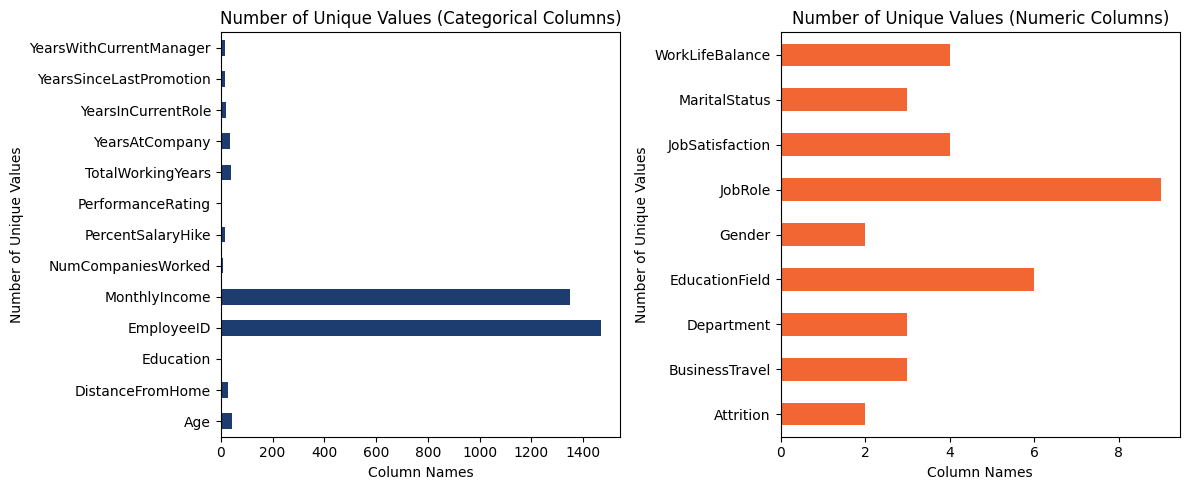

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
num_col.nunique().plot(kind='barh', color='#1D3D71')
plt.title('Number of Unique Values (Categorical Columns)')
plt.xlabel('Column Names')
plt.ylabel('Number of Unique Values')

plt.subplot(1, 2, 2)
cat_col.nunique().plot(kind='barh', color='#F26634')
plt.title('Number of Unique Values (Numeric Columns)')
plt.xlabel('Column Names')
plt.ylabel('Number of Unique Values')

plt.tight_layout()
plt.show()

In [7]:
low_cardinality= []
def check_cardinality(df, type):
    print (f"Kolom-kolom berjenis {type}:")
    print('-'*40)
    for kol in df.columns:
        nilai_unik= df[kol].nunique()
        if nilai_unik < 10:
            low_cardinality.append(kol)
            print(f"Nilai unik kolom {kol}: {df[kol].unique()}")
        else:
            pass
    

check_cardinality(cat_col, 'category')
check_cardinality(num_col, 'numeric')

Kolom-kolom berjenis category:
----------------------------------------
Nilai unik kolom Attrition: ['No' 'Yes']
Nilai unik kolom BusinessTravel: ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Nilai unik kolom Department: ['Research & Development' 'Sales' 'Human Resources']
Nilai unik kolom EducationField: ['Medical' 'Marketing' 'Life Sciences' 'Other' 'Technical Degree'
 'Human Resources']
Nilai unik kolom Gender: ['Female' 'Male']
Nilai unik kolom JobRole: ['Manufacturing Director' 'Healthcare Representative' 'Sales Executive'
 'Manager' 'Laboratory Technician' 'Research Scientist' 'Human Resources'
 'Sales Representative' 'Research Director']
Nilai unik kolom JobSatisfaction: ['Medium' 'Low' 'Very High' 'High']
Nilai unik kolom MaritalStatus: ['Divorced' 'Married' 'Single']
Nilai unik kolom WorkLifeBalance: ['Good' 'Bad' 'Better' 'Best']
Kolom-kolom berjenis numeric:
----------------------------------------
Nilai unik kolom Education: [3 2 4 5 1]
Nilai unik kolom PerformanceRati

Dari Ke dua kenos data kategorikal maupun numerikal yang memiliki sedikit kardinalitas:  
1. Ordinal  
    BusinessTravel
    JobSatisfaction
    WorkLifeBalance
2. Nominal
    Attrition
    Department
    EducationField
    Gender
    JobRole
    MaritalStatus
Saya kelompokkan untuk membantu saya melakukan feature encoding

## Cek Missing Value

In [8]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

Terlihat tidak ada Misiing value dalam dataset

## Cek Data Duplicate

In [9]:
df.duplicated().sum()

0

# 4. Exploratory Data Analysis (EDA)

## Buat Kolom Baru

### Kategori Kepuasan

Hitung Bulan Bekerja

In [10]:
df['MonthAtCompany'] = df['YearsAtCompany'] * 12
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,MonthAtCompany
0,28,No,Travel_Rarely,Research & Development,3,3,Medical,1121,Female,Manufacturing Director,Medium,Divorced,7655,0,17,3,10,Good,9,7,1,7,108
1,37,Yes,Travel_Rarely,Research & Development,11,2,Medical,1033,Female,Healthcare Representative,Medium,Married,4777,5,15,3,15,Bad,1,0,0,0,12
2,38,No,Travel_Rarely,Sales,2,2,Marketing,1125,Male,Sales Executive,Medium,Single,7351,7,16,3,10,Better,1,0,0,0,12
3,55,Yes,Travel_Rarely,Research & Development,2,3,Medical,787,Male,Manager,Low,Married,19859,5,13,3,24,Better,5,2,1,4,60
4,31,No,Travel_Rarely,Sales,5,4,Life Sciences,1673,Female,Sales Executive,Very High,Married,5476,1,11,3,10,Better,10,0,0,2,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,44,No,Travel_Rarely,Research & Development,10,4,Other,40,Male,Healthcare Representative,Very High,Married,6465,2,13,3,9,Best,4,2,1,3,48
1466,31,No,Non-Travel,Sales,2,4,Life Sciences,1324,Female,Sales Executive,High,Divorced,9852,1,19,3,10,Good,10,8,9,6,120
1467,30,No,Travel_Rarely,Human Resources,1,3,Life Sciences,1499,Male,Human Resources,High,Divorced,2064,0,21,4,6,Best,5,3,1,3,60
1468,50,No,Travel_Rarely,Research & Development,9,3,Life Sciences,1030,Male,Laboratory Technician,Very High,Married,2380,4,18,3,8,Better,1,0,0,0,12


Eksekusi Kolom

unsatisfied : ≤ 8 bulan  
decent : ≤ 18 bulan  
satisfied : ≤ 48 bulan  
loyal : ≤ 120 bulan  
devoted : ≥ 121 bulan  

In [11]:
datas= []

for dur in df['MonthAtCompany']:
    if dur <= 8:
        datas.append('unsatisfied')
    elif dur <= 18:
        datas.append('decent')
    elif dur <= 48:
        datas.append('satisfied')
    elif dur <= 120:
        datas.append('loyal')
    else:
        datas.append('devoted')

df['Satisfaction']= datas

### Kenaikan Gaji Baru

Formula : (5 %) + (PerformanceRating * 2) % + (YearsAtCompany / 5) %. Dimana 5 % diawal merupakan faktor inflasi.

Eksekusi Kolom

In [12]:
df['NewPercentSalaryHike']= 5 + (df['PerformanceRating']*2) + df['YearsAtCompany']/5


In [13]:
df[['PerformanceRating', 'YearsAtCompany', 'NewPercentSalaryHike']]

,PerformanceRating,YearsAtCompany,NewPercentSalaryHike
0,3,9,12.8
1,3,1,11.2
2,3,1,11.2
3,3,5,12.0
4,3,10,13.0
...,...,...,...
1465,3,4,11.8
1466,3,10,13.0
1467,4,5,14.0
1468,3,1,11.2


### Cek Kolom Baru

In [14]:
df['Satisfaction'].value_counts().sort_values(ascending= False)

Satisfaction
loyal          644
satisfied      365
devoted        246
decent         171
unsatisfied     44
Name: count, dtype: int64

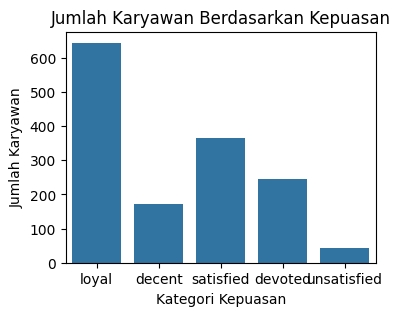

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(data= df, x= 'Satisfaction')
plt.title('Jumlah Karyawan Berdasarkan Kepuasan')
plt.xlabel('Kategori Kepuasan')
plt.ylabel('Jumlah Karyawan')
plt.show()


## Gambaran Statistika Data

In [16]:
cat_col.describe().transpose()

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
JobSatisfaction,1470,4,Very High,459
MaritalStatus,1470,3,Married,673
WorkLifeBalance,1470,4,Better,893


In [17]:
num_col.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeID,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.00,3.0,3.00,4.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0


## Cek Distribusi Data

In [18]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(exclude = 'object')

### Plot Distribusi Data jenis Kategori

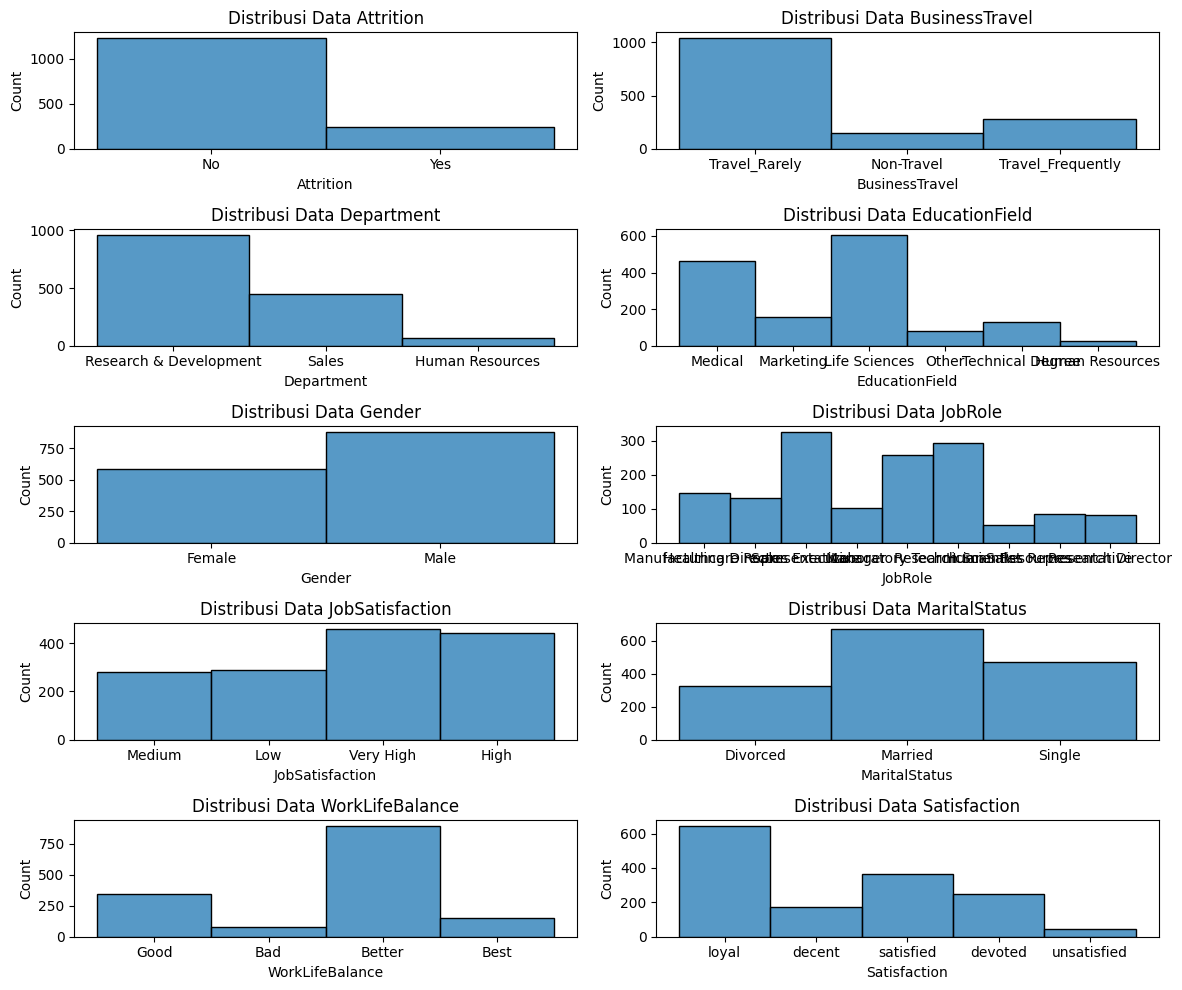

In [19]:

cols = len(cat_col.columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, cols * 1))
axes = axes.flatten()  

for i, kolom in enumerate(cat_col.columns):
    ax = sns.histplot(data=cat_col, x=kolom, bins=30, ax=axes[i])
    ax.set_title(f'Distribusi Data {kolom}')
    ax.set_xlabel(kolom)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)

plt.tight_layout()
plt.show()


### Plot Distribusi Data jenis Numerik

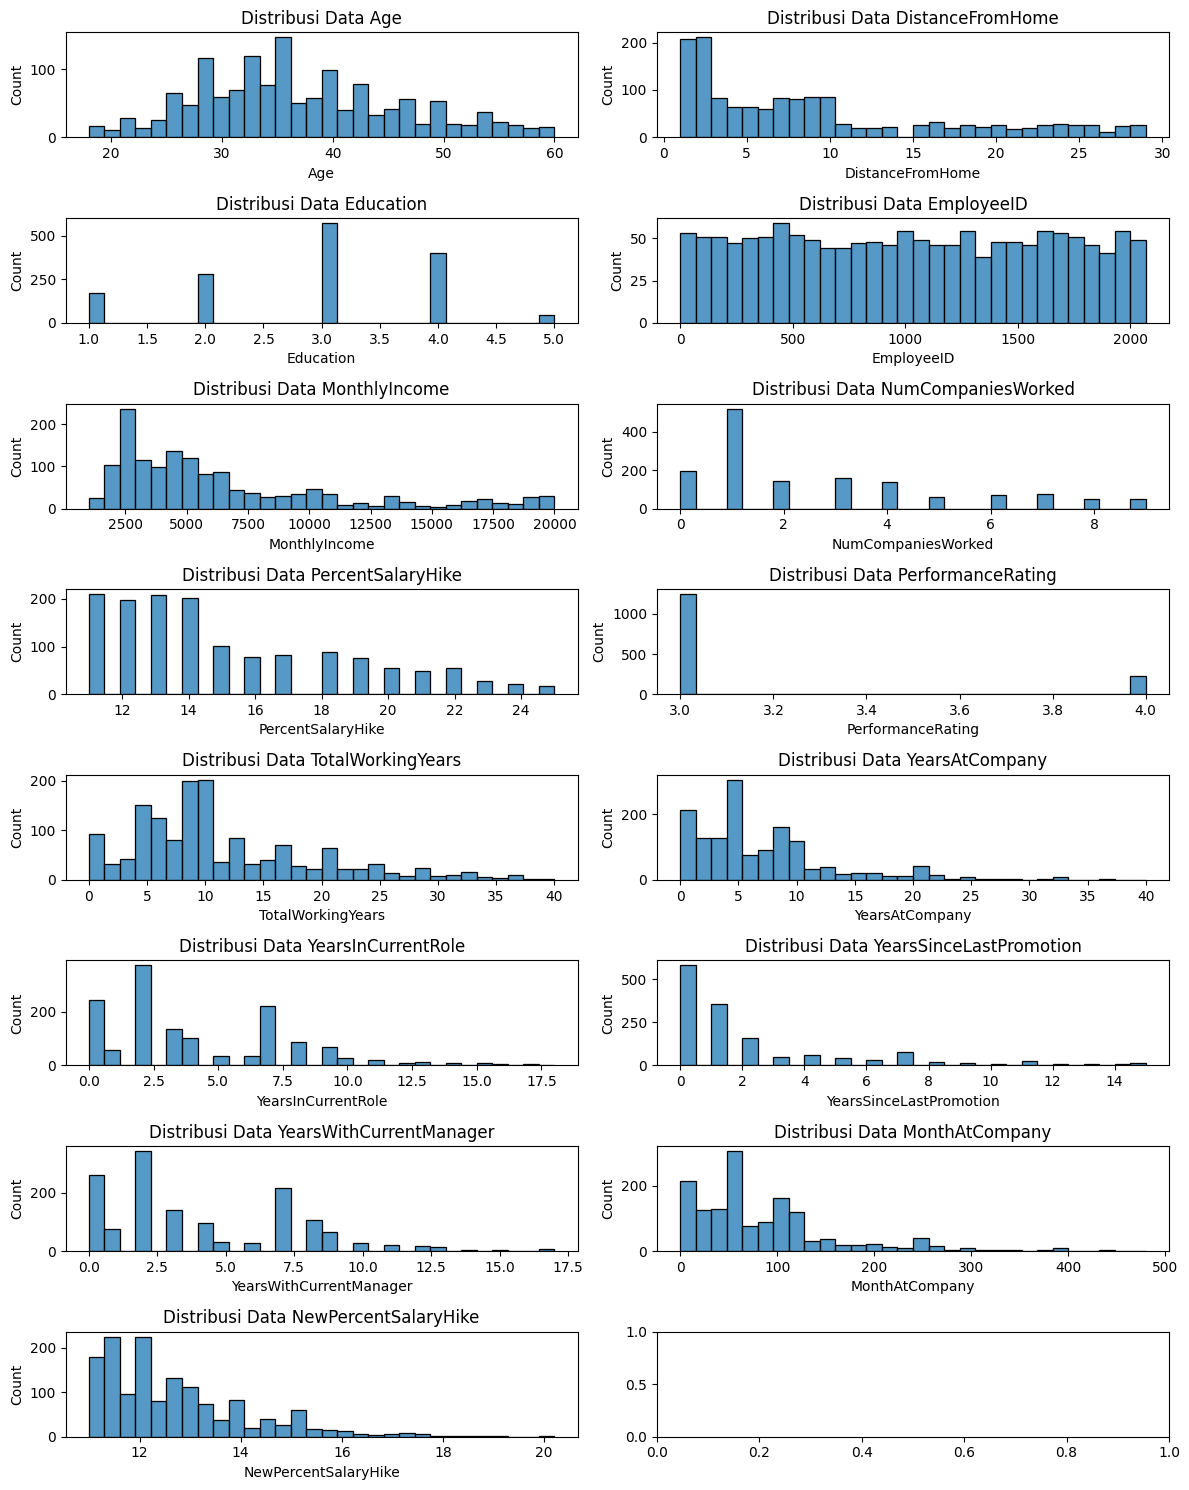

In [20]:
cols = len(num_col.columns)
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, cols * 1))
axes = axes.flatten()  

for i, kolom in enumerate(num_col.columns):
    ax = sns.histplot(data=num_col, x=kolom, bins=30, ax=axes[i])
    ax.set_title(f'Distribusi Data {kolom}')
    ax.set_xlabel(kolom)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)

plt.tight_layout()
plt.show()


## Cek Outliers

In [21]:
def find_outliers(df, column):
  Q1 = num_col[kolom].quantile(0.25)
  Q3 = num_col[kolom].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return upper_bound, lower_bound

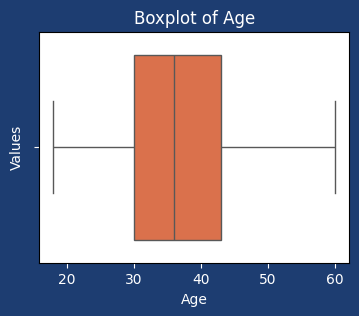

Nilai maksimum untuk Age: 60
Nilai minimum untuk Age: 18
Batas atas outlier untuk Age: 62.5
Batas bawah outlier untuk Age: 10.5



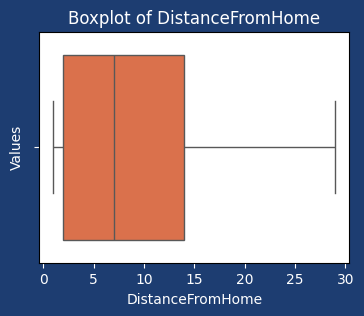

Nilai maksimum untuk DistanceFromHome: 29
Nilai minimum untuk DistanceFromHome: 1
Batas atas outlier untuk DistanceFromHome: 32.0
Batas bawah outlier untuk DistanceFromHome: -16.0



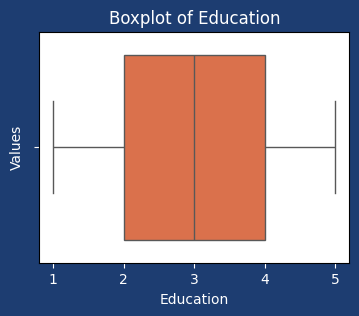

Nilai maksimum untuk Education: 5
Nilai minimum untuk Education: 1
Batas atas outlier untuk Education: 7.0
Batas bawah outlier untuk Education: -1.0



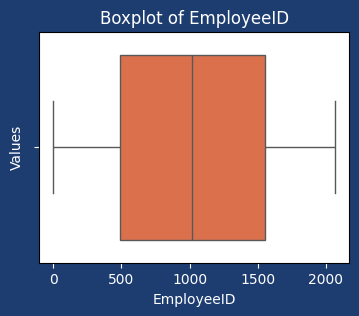

Nilai maksimum untuk EmployeeID: 2068
Nilai minimum untuk EmployeeID: 1
Batas atas outlier untuk EmployeeID: 3152.5
Batas bawah outlier untuk EmployeeID: -1105.5



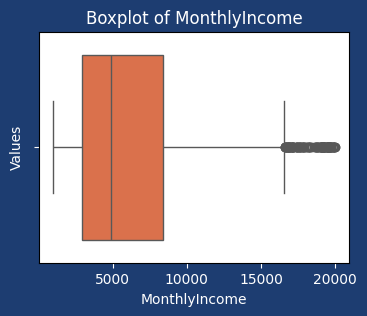

Nilai maksimum untuk MonthlyIncome: 19999
Nilai minimum untuk MonthlyIncome: 1009
Batas atas outlier untuk MonthlyIncome: 16581.0
Batas bawah outlier untuk MonthlyIncome: -5291.0



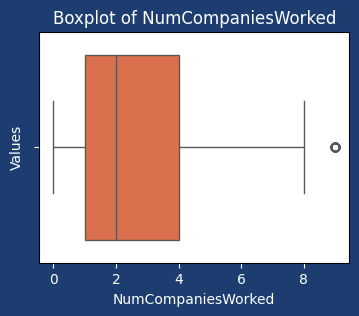

Nilai maksimum untuk NumCompaniesWorked: 9
Nilai minimum untuk NumCompaniesWorked: 0
Batas atas outlier untuk NumCompaniesWorked: 8.5
Batas bawah outlier untuk NumCompaniesWorked: -3.5



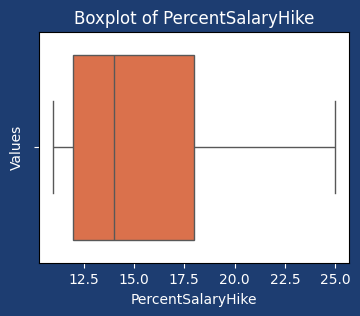

Nilai maksimum untuk PercentSalaryHike: 25
Nilai minimum untuk PercentSalaryHike: 11
Batas atas outlier untuk PercentSalaryHike: 27.0
Batas bawah outlier untuk PercentSalaryHike: 3.0



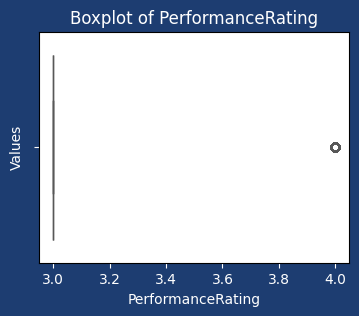

Nilai maksimum untuk PerformanceRating: 4
Nilai minimum untuk PerformanceRating: 3
Batas atas outlier untuk PerformanceRating: 3.0
Batas bawah outlier untuk PerformanceRating: 3.0



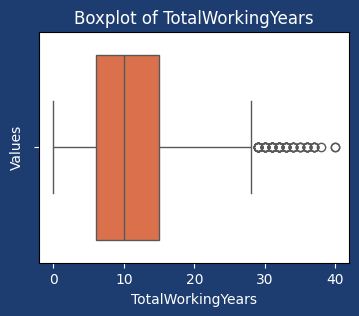

Nilai maksimum untuk TotalWorkingYears: 40
Nilai minimum untuk TotalWorkingYears: 0
Batas atas outlier untuk TotalWorkingYears: 28.5
Batas bawah outlier untuk TotalWorkingYears: -7.5



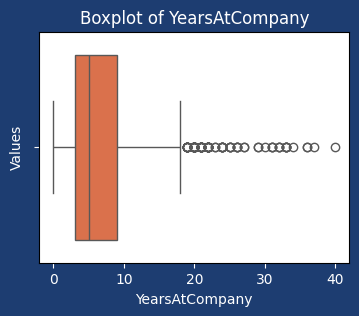

Nilai maksimum untuk YearsAtCompany: 40
Nilai minimum untuk YearsAtCompany: 0
Batas atas outlier untuk YearsAtCompany: 18.0
Batas bawah outlier untuk YearsAtCompany: -6.0



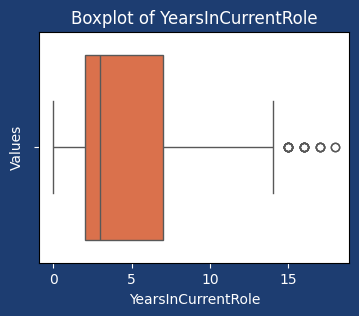

Nilai maksimum untuk YearsInCurrentRole: 18
Nilai minimum untuk YearsInCurrentRole: 0
Batas atas outlier untuk YearsInCurrentRole: 14.5
Batas bawah outlier untuk YearsInCurrentRole: -5.5



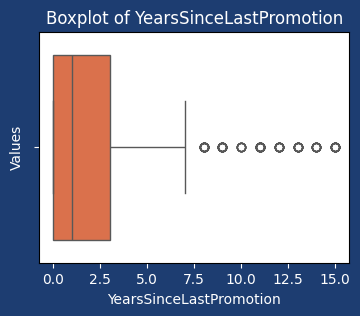

Nilai maksimum untuk YearsSinceLastPromotion: 15
Nilai minimum untuk YearsSinceLastPromotion: 0
Batas atas outlier untuk YearsSinceLastPromotion: 7.5
Batas bawah outlier untuk YearsSinceLastPromotion: -4.5



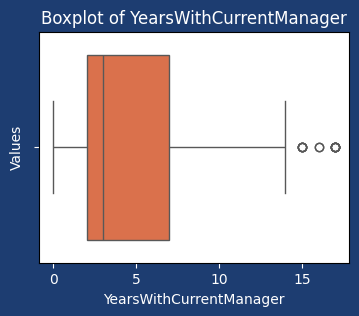

Nilai maksimum untuk YearsWithCurrentManager: 17
Nilai minimum untuk YearsWithCurrentManager: 0
Batas atas outlier untuk YearsWithCurrentManager: 14.5
Batas bawah outlier untuk YearsWithCurrentManager: -5.5



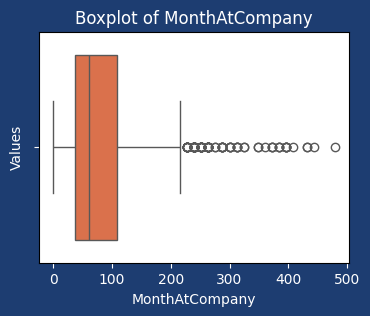

Nilai maksimum untuk MonthAtCompany: 480
Nilai minimum untuk MonthAtCompany: 0
Batas atas outlier untuk MonthAtCompany: 216.0
Batas bawah outlier untuk MonthAtCompany: -72.0



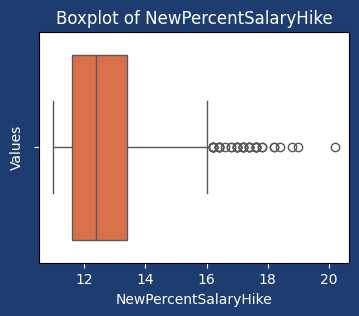

Nilai maksimum untuk NewPercentSalaryHike: 20.2
Nilai minimum untuk NewPercentSalaryHike: 11.0
Batas atas outlier untuk NewPercentSalaryHike: 16.1
Batas bawah outlier untuk NewPercentSalaryHike: 8.899999999999999



In [22]:
for kolom in num_col:
  Q1 = num_col[kolom].quantile(0.25)
  Q3 = num_col[kolom].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  plt.figure(figsize=(4, 3), facecolor='#1D3D71')
  sns.boxplot(x=num_col[kolom], color='#F26634')
  ax.set_facecolor('#1D3D71')
  plt.title(f'Boxplot of {kolom}', color='white')
  plt.xlabel(kolom, color='white')
  plt.ylabel('Values', color='white')
  plt.tick_params(colors='white')
  plt.show()

  print(f'Nilai maksimum untuk {kolom}: {num_col[kolom].max()}')
  print(f'Nilai minimum untuk {kolom}: {num_col[kolom].min()}')
  print(f'Batas atas outlier untuk {kolom}: {upper_bound}')
  print(f'Batas bawah outlier untuk {kolom}: {lower_bound}\n')

# Feature Engineering

Label Encoding

In [23]:
encode = LabelEncoder()

for col in cat_col:
    df[col] = encode.fit_transform(df[col])
    
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,MonthAtCompany,Satisfaction,NewPercentSalaryHike
0,28,0,2,1,3,3,3,1121,0,4,2,0,7655,0,17,3,10,3,9,7,1,7,108,2,12.8
1,37,1,2,1,11,2,3,1033,0,0,2,1,4777,5,15,3,15,0,1,0,0,0,12,0,11.2
2,38,0,2,2,2,2,2,1125,1,7,2,2,7351,7,16,3,10,2,1,0,0,0,12,0,11.2
3,55,1,2,1,2,3,3,787,1,3,1,1,19859,5,13,3,24,2,5,2,1,4,60,2,12.0
4,31,0,2,2,5,4,1,1673,0,7,3,1,5476,1,11,3,10,2,10,0,0,2,120,2,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,44,0,2,1,10,4,4,40,1,0,3,1,6465,2,13,3,9,1,4,2,1,3,48,3,11.8
1466,31,0,0,2,2,4,1,1324,0,7,0,0,9852,1,19,3,10,3,10,8,9,6,120,2,13.0
1467,30,0,2,0,1,3,1,1499,1,1,0,0,2064,0,21,4,6,1,5,3,1,3,60,2,14.0
1468,50,0,2,1,9,3,1,1030,1,2,3,1,2380,4,18,3,8,2,1,0,0,0,12,0,11.2


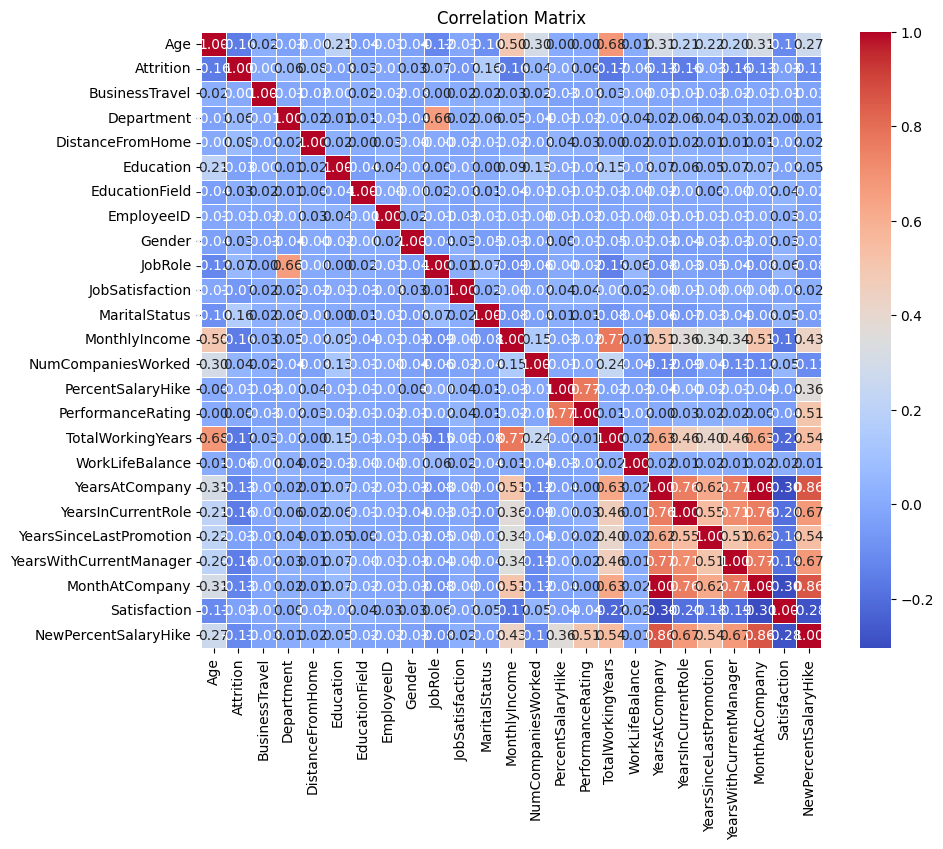

In [24]:
df_corr = df.copy()
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Outliers Handling

In [25]:
DistanceFromHome_upper, DistanceFromHome_lower= find_outliers(df, 'DistanceFromHome')
Age_upper, Age_lower= find_outliers(df, 'Age')
MonthlyIncome_upper, MonthlyIncome_lower= find_outliers(df, 'MonthlyIncome')

In [26]:
# df= df[(df['DistanceFromHome'] >= DistanceFromHome_lower) & (df['DistanceFromHome'] <= DistanceFromHome_upper)]
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,MonthAtCompany,Satisfaction,NewPercentSalaryHike
0,28,0,2,1,3,3,3,1121,0,4,2,0,7655,0,17,3,10,3,9,7,1,7,108,2,12.8
1,37,1,2,1,11,2,3,1033,0,0,2,1,4777,5,15,3,15,0,1,0,0,0,12,0,11.2
2,38,0,2,2,2,2,2,1125,1,7,2,2,7351,7,16,3,10,2,1,0,0,0,12,0,11.2
3,55,1,2,1,2,3,3,787,1,3,1,1,19859,5,13,3,24,2,5,2,1,4,60,2,12.0
4,31,0,2,2,5,4,1,1673,0,7,3,1,5476,1,11,3,10,2,10,0,0,2,120,2,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,44,0,2,1,10,4,4,40,1,0,3,1,6465,2,13,3,9,1,4,2,1,3,48,3,11.8
1466,31,0,0,2,2,4,1,1324,0,7,0,0,9852,1,19,3,10,3,10,8,9,6,120,2,13.0
1467,30,0,2,0,1,3,1,1499,1,1,0,0,2064,0,21,4,6,1,5,3,1,3,60,2,14.0
1468,50,0,2,1,9,3,1,1030,1,2,3,1,2380,4,18,3,8,2,1,0,0,0,12,0,11.2


## Split Data

In [27]:
X= df.drop('Attrition', axis= 1)
y= df['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)


Train size :  (1176, 24)
Test size  :  (294, 24)


In [28]:
outliers_MonthlyIncome = np.where(X_train['MonthlyIncome'] > MonthlyIncome_upper, True,
                       np.where(X_train['MonthlyIncome'] < MonthlyIncome_lower, True, False))

# Trimming the dataset
X_train_trimmed = X_train.loc[~(outliers_MonthlyIncome)]

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)



Size dataset - Before trimming :  (1176, 24)
Size dataset - After trimming  :  (0, 24)


## Feature Scaling

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.42997607,  0.57185945, -0.48991491, ...,  1.10853483,
        -0.91358566,  0.75504586],
       [-0.64750752,  0.57185945,  1.40528225, ..., -0.33638298,
         0.09238507,  0.89487798],
       [-0.42997607,  0.57185945,  1.40528225, ...,  0.30580271,
         0.09238507,  1.45420644],
       ...,
       [ 1.20150981, -0.96004649, -0.48991491, ...,  2.39290622,
        -0.91358566,  1.87370279],
       [-0.86503897,  0.57185945,  1.40528225, ..., -0.17583656,
         0.09238507, -0.36361106],
       [ 0.22261828, -2.49195243, -0.48991491, ..., -0.17583656,
         0.09238507,  1.0347101 ]])

# Model Definition

DecisionTree Classifier 

In [30]:
model_dtc = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [31]:
RandomForest

NameError: name 'RandomForest' is not defined

In [ ]:
model_rfc = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Model Train

In [ ]:
model_dtc.fit(X_train_scaled, y_train)
model_rfc.fit(X_train_scaled, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

# Model Evaluation

Evaluasi Model DecisionTree

In [ ]:
y_pred_train_dtc = model_dtc.predict(X_train_scaled)
y_pred_test_dtc = model_dtc.predict(X_test_scaled)

Evaluasi Model Random Forest

In [ ]:
y_pred_train_rfc = model_rfc.predict(X_train_scaled)
y_pred_test_rfc = model_rfc.predict(X_test_scaled)

In [33]:
print("Decision Tree Model Train :")
print("Accuracy Score:", accuracy_score(y_train, y_pred_train_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_dtc))
print("Classification Report:\n", classification_report(y_train, y_pred_train_dtc))

mse = mean_squared_error(y_train, y_pred_train_dtc) 
rmse = np.sqrt(mse)  
print('Nilai R-squared Train : ', r2_score(y_train, y_pred_train_dtc)*100) 
print('Nilai MSE Train : ', mse)  
print('Nilai RMSE Train : ', rmse)  
print('')

print("Decision Tree Model Test :")
print("Accuracy Score:", accuracy_score(y_test, y_pred_test_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_dtc))
print("Classification Report:\n", classification_report(y_test, y_pred_test_dtc))
mse_test = mean_squared_error(y_test, y_pred_test_dtc) 
rmse_test = np.sqrt(mse_test)  
print('Nilai R-squared Test : ', r2_score(y_test, y_pred_test_dtc)*100) 
print('Nilai MSE Test : ', mse_test)  
print('Nilai RMSE Test : ', rmse_test)  

Decision Tree Model Train :


NameError: name 'y_pred_train_dtc' is not defined

# Model Saving

# Model Inference

# Pengambilan Keputusan